<a href="https://colab.research.google.com/github/nick-d-james/academic-writing/blob/master/neural_networks_manifolds_topology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
<h1>Walking Through Chris Olah's: <b>Neural Networks, Manifolds, and Topology</b></h1>

Nick D. James, PhD

The Ottawa Hospital - Systems Architecture

March 2020
</div>

---
The following presentation is based on https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/


## A Simple Example
<img src="https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/simple2_linear.png" alt="Drawing" width="210"/>
<small>[Image by Chris Olah]</small>

- Two input features: $(u, v) \in \mathbb R^2$
- Binary ground truth: red (negative), blue (positive)

Instead of Olah's two, continuous curves, let's pick a sample of 50 red points and 50 blue points on those curves:
\begin{align}
\mathcal X &= \left ((u_1, v_1), (u_2, v_2), \ldots, (u_{100}, v_{100})\right) \in \mathbb R^{100\times 2}\\
y &= (y_1, y_2, \ldots, y_{100}) \in \{0,1\}^{100}
\end{align}



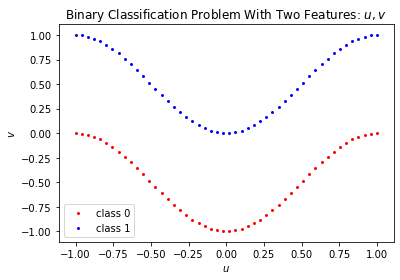

In [1]:
#@title [Click to expand code block that generates the red/blue dataset]
import numpy as np
import matplotlib.pyplot as plt
import seaborn

def create_cos_curve_points(n_points=50, 
                            dc_bias=0.0,
                            amplitude=0.5,
                            phase=np.pi,
                            u_noise_std_dev=0.0,
                            v_noise_std_dev=0.0):
  u_noise = np.random.normal(scale=u_noise_std_dev, size=(n_points,))
  v_noise = np.random.normal(scale=v_noise_std_dev, size=(n_points,))
  u = np.linspace(-1, 1, num=n_points) + u_noise
  v = amplitude * np.cos(np.pi * u + phase) + v_noise + dc_bias
  return np.stack((u, v), axis=-1)

def scatter_n_by_2(n_by_2_array, *args, **kwargs):
  return plt.scatter(n_by_2_array[:, 0], n_by_2_array[:, 1], *args, **kwargs)

def show_plot_frame(title):
  plt.xlabel("$u$")
  plt.ylabel("$v$")
  plt.legend(("class 0", "class 1"))
  plt.title(title)
  plt.show()

blue_points = create_cos_curve_points(dc_bias=0.5)
red_points = create_cos_curve_points(dc_bias=-0.5)
X = np.concatenate([blue_points, red_points], axis=0)
y = np.concatenate([np.ones(shape=(blue_points.shape[0],)), np.zeros(shape=(red_points.shape[0],))])

scatter_n_by_2(red_points, color='red', marker='.', linewidths=0)
scatter_n_by_2(blue_points, color='blue', marker='.', linewidths=0)
show_plot_frame("Binary Classification Problem With Two Features: $u, v$")

In [2]:
#@title Our dataset of 50 red and 50 blue points
print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (100, 2)
y.shape = (100,)


In [3]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

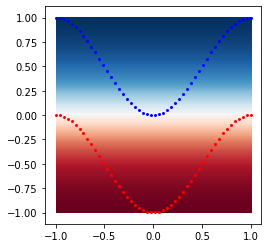

In [4]:
test_points = [(xx, yy) for yy in np.linspace(1, -1, num=400) for xx in np.linspace(-1, 1, num=400)]
y_hat = logreg.predict_proba(test_points)[:,1].reshape(400,400)
plt.imshow(y_hat, cmap='RdBu', extent=(-1, 1, -1, 1))
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue', marker='.', linewidths=0)
plt.scatter(red_points[:,0], red_points[:,1], color='red', marker='.', linewidths=0)
plt.show()

In [30]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='tanh', hidden_layer_sizes=(1,), batch_size=16)
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size=16, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

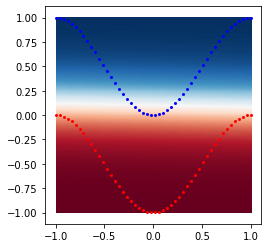

In [31]:
y_hat = model.predict_proba(test_points)[:,1].reshape(400,400)
plt.imshow(y_hat, cmap='RdBu', extent=(-1, 1, -1, 1))
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue', marker='.', linewidths=0)
plt.scatter(red_points[:,0], red_points[:,1], color='red', marker='.', linewidths=0)
plt.show()

In [18]:
print("{} layers, {} outputs".format(model.n_layers_, model.n_outputs_))
print(model.coefs_)
model.intercepts_

3 layers, 1 outputs
[array([[ 1.00135864, -0.1825401 ],
       [ 0.30464591, -1.42081233]]), array([[ 0.76146431],
       [-1.10811538]])]


[array([1.35908079, 0.99889096]), array([-0.01210344])]

In [52]:
len(grid)

160000

In [0]:
y_hat = y_hat.reshape(400,400)

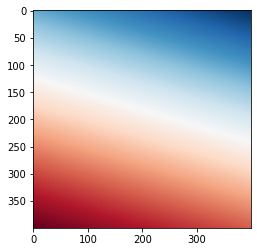

In [56]:
plt.imshow(y_hat, cmap='RdBu')

In [9]:
sklearn.show_versions()


System:
    python: 3.6.9 (default, Nov  7 2019, 10:44:02)  [GCC 8.3.0]
executable: /usr/bin/python3
   machine: Linux-4.14.137+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 19.3.1
setuptools: 45.2.0
   sklearn: 0.22.1
     numpy: 1.17.5
     scipy: 1.4.1
    Cython: 0.29.15
    pandas: 0.25.3
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [12]:
model.hidden_layer_sizes

()

In [0]:
# ---=== The following excerpt taken from 
# ---=== https://nbviewer.jupyter.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb

# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm


# Data manipulation:

def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments


# Interface to LineCollection:

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc
        
    
def clear_frame(ax=None): 
    # Taken from a post by Tony S Yu
    if ax is None: 
        ax = plt.gca() 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    for spine in ax.spines.itervalues(): 
        spine.set_visible(False) 

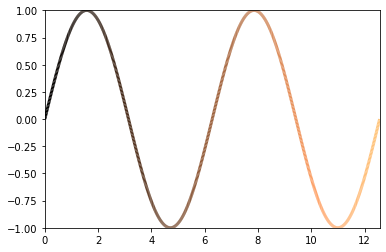

In [17]:
x = np.linspace(0, 4.*np.pi, 1000)
y = np.sin(x)

fig, axes = plt.subplots()

colorline(x, y)

plt.xlim(x.min(), x.max())
plt.ylim(-1.0, 1.0)
plt.show()

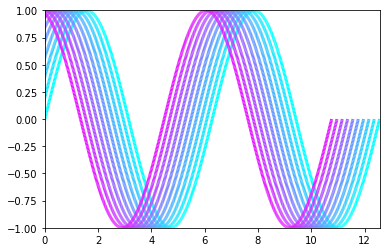

In [19]:
x = np.linspace(0, 4.*np.pi, 1000)
y = np.sin(x)

fig, axes = plt.subplots()

N = 10
for i in range(N):
    color = i / float(N)
    shift = 0.2 * i
    colorline(x-shift, y, color, cmap="cool")
    
plt.xlim(x.min(), x.max())
plt.ylim(-1.0, 1.0)
plt.show()  